<a href="https://colab.research.google.com/github/nedokormysh/Skillbox_DS_intro_intensive/blob/main/Skillbox_DS_Day_1_28_03_22_my_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## День 1

**Сегодня**:

— Работа в Google Colab

— Введение в python, pandas

Файл с данными: [trips_data.xlsx](https://drive.google.com/file/d/18Hyh1l9H3bR556W1tO2vKwpfAqZPueEp/view?usp=sharing)

In [1]:
import pandas as pd

Скачивание данных

In [3]:
trips_data = pd.read_excel('https://github.com/nedokormysh/Skillbox_DS_intro_intensive/blob/main/trips_data.xlsx?raw=true')

Рассмотрим какие колонки есть в наших данных.

In [4]:
trips_data.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0,New York
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney
3,161000.0,Краснодар,41.0,Шоппинг,Автомобиль,0.0,New York
4,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0,Sydney


Также можно вывести описательные рассчёты по количественным метрикам.

In [5]:
trips_data.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


Рассмотрим одну колонку

In [6]:
trips_data.age

0      25.0
1      60.0
2      49.0
3      41.0
4      58.0
       ... 
995    55.0
996    32.0
997    68.0
998    69.0
999    35.0
Name: age, Length: 1000, dtype: float64

Можем построить график распределения количества людей по возрастам.

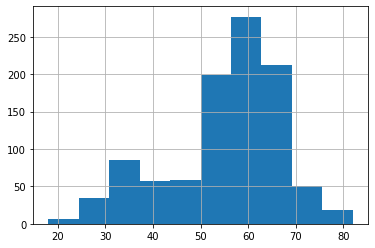

In [7]:
trips_data.age.hist()

Тоже самое с зарплатой

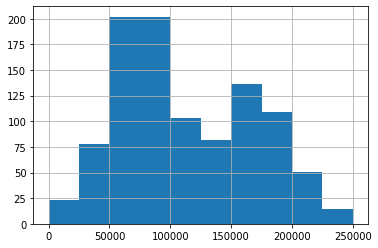

In [8]:
trips_data.salary.hist()

Попытался сделать по городам.

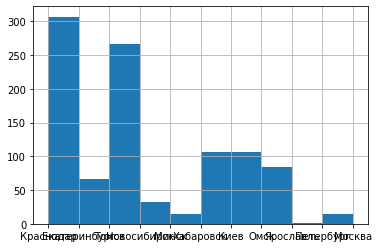

In [9]:
trips_data.city.hist()

value_counts вернет количество уникальных совпадений в определенной колонке по убыванию.

In [10]:
trips_data.city.value_counts()

Краснодар       307
Томск           267
Хабаровск       107
Киев            106
Омск             84
Екатеринбург     67
Новосибирск      33
Минск            14
Петербург        13
Ярославль         1
Москва            1
Name: city, dtype: int64

Что можем сказать о данной туристической фирме, исходя из данных по городам.


Компания представлена лишь на части территории России. Активно работает с Сибирью и меньше с европейской частью

Задача по параметрам человека определить куда человек вероятнее полетит.

In [11]:
trips_data.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000.0,Краснодар,25.0,Шоппинг,Автомобиль,1.0,New York
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London
2,83000.0,Томск,49.0,Архитектура,Автомобиль,2.0,Sydney
3,161000.0,Краснодар,41.0,Шоппинг,Автомобиль,0.0,New York
4,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0,Sydney


Эти данные плохо подходят для маш. обучения. Много нечисловых данных. Заменим текстовые данные на числовые. Модель может сравнивать числа внутри колонки. Но нам не надо этого. поэтому поместим наши новые числа в разные колонки.

In [12]:
df = pd.get_dummies(trips_data, columns=['vacation_preference', 'transport_preference', 'city'])

Нужно разделить данные на входные и выходные.
Задача модели машинного обучения - найти закономерности.(X, y - target)
Икс - входные данные, данные на основе, которых мы будем делать прогноз.
Игрек - выходные данные. то, что мы пытаемся предсказать.


In [13]:
y = df.target # только колонка target
X = df.drop('target', axis=1) #выкидываем целевую колонку. т.е. берём всё, кроме колонки таргет.

In [14]:
X.head()

,salary,age,family_members,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,...,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,city_Петербург,city_Томск,city_Хабаровск,city_Ярославль
0,196000.0,25.0,1.0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,152000.0,60.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,83000.0,49.0,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,161000.0,41.0,0.0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,146000.0,58.0,1.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
y.head()

0    New York
1      London
2      Sydney
3    New York
4      Sydney
Name: target, dtype: object

Как правило разделяют ещё на тестовую и тренировочную выборку.

In [16]:
# Logistic regression - самая простая модель машинного обучения.
from sklearn.linear_model import LogisticRegression

In [17]:
lg_model = LogisticRegression() #настройки
lg_model.fit(X, y) #обучение модели

LogisticRegression()

In [18]:
lg_model.feature_names_in_

array(['salary', 'age', 'family_members',
       'vacation_preference_Архитектура',
       'vacation_preference_Ночные клубы',
       'vacation_preference_Пляжный отдых', 'vacation_preference_Шоппинг',
       'transport_preference_Автомобиль',
       'transport_preference_Космический корабль',
       'transport_preference_Морской транспорт',
       'transport_preference_Поезд', 'transport_preference_Самолет',
       'city_Екатеринбург', 'city_Киев', 'city_Краснодар', 'city_Минск',
       'city_Москва', 'city_Новосибирск', 'city_Омск', 'city_Петербург',
       'city_Томск', 'city_Хабаровск', 'city_Ярославль'], dtype=object)

Хотим добавить некую запись в X для того, чтобы предсказать куда полетит человек. Для этого создадим словарь, в который добавим для всех колонок X значение 0.

In [19]:
{col:[0] for col in X.columns}

{'age': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

In [ ]:
{col:[0] for col in lg_model.feature_names_in_}

{'age': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

Т.е. мы создали словарь, где ключи - названия колонок из Икс, а значения - [0]. Создадим теперь некий объект - "рыбу": example. И выставим произвольные значения.

In [20]:
example = {'age': [16],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [1],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [1],
 'salary': [30000],
 'transport_preference_Автомобиль': [1],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [1]}

Создаём датафрейм с нашим объектом.

In [21]:
ex_df = pd.DataFrame(example)

Применяем модель. Существует ошибка, т.к. порядок колонок при создании словаря не совпадает с порядком колонок в изначальном датафрейме. Но уже есть предсказание нью-йорк.

In [22]:
lg_model.predict(ex_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array(['New York'], dtype=object)

In [23]:
{ col:[0] for col in enumerate(X.columns) }

{(0, 'salary'): [0],
 (1, 'age'): [0],
 (2, 'family_members'): [0],
 (3, 'vacation_preference_Архитектура'): [0],
 (4, 'vacation_preference_Ночные клубы'): [0],
 (5, 'vacation_preference_Пляжный отдых'): [0],
 (6, 'vacation_preference_Шоппинг'): [0],
 (7, 'transport_preference_Автомобиль'): [0],
 (8, 'transport_preference_Космический корабль'): [0],
 (9, 'transport_preference_Морской транспорт'): [0],
 (10, 'transport_preference_Поезд'): [0],
 (11, 'transport_preference_Самолет'): [0],
 (12, 'city_Екатеринбург'): [0],
 (13, 'city_Киев'): [0],
 (14, 'city_Краснодар'): [0],
 (15, 'city_Минск'): [0],
 (16, 'city_Москва'): [0],
 (17, 'city_Новосибирск'): [0],
 (18, 'city_Омск'): [0],
 (19, 'city_Петербург'): [0],
 (20, 'city_Томск'): [0],
 (21, 'city_Хабаровск'): [0],
 (22, 'city_Ярославль'): [0]}

In [24]:
{col:[0] for col in df.columns.tolist() }

{'age': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],
 'family_members': [0],
 'salary': [0],
 'target': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0]}

В общем, попробуем исправить ошибку в тупую.

In [27]:
example_repair = {'salary': [0],
 'age': [0],
 'family_members': [0],
 'vacation_preference_Архитектура': [0],
 'vacation_preference_Ночные клубы': [0],
 'vacation_preference_Пляжный отдых': [0],
 'vacation_preference_Шоппинг': [0],
 'transport_preference_Автомобиль': [0],
 'transport_preference_Космический корабль': [0],
 'transport_preference_Морской транспорт': [0],
 'transport_preference_Поезд': [0],
 'transport_preference_Самолет': [0],
 'city_Екатеринбург': [0],
 'city_Киев': [0],
 'city_Краснодар': [0],
 'city_Минск': [0],
 'city_Москва': [0],
 'city_Новосибирск': [0],
 'city_Омск': [0],
 'city_Петербург': [0],
 'city_Томск': [0],
 'city_Хабаровск': [0],
 'city_Ярославль': [0],}


example_df_repair = pd.DataFrame(example_repair)

lg_model.predict(example_df_repair)

array(['Paris'], dtype=object)

 С помощью pandas, найти:

   — Самых взрослых людей в каждом городе



In [28]:
trips_data.groupby('city').agg({'age': ['max']})

,age
,max
city,
Екатеринбург,74.0
Киев,81.0
Краснодар,78.0
Минск,78.0
Москва,75.0
Новосибирск,76.0
Омск,80.0
Петербург,76.0


   — У кого из любителей Самолетов самая высокая зарплата?


In [29]:
trips_data.loc[trips_data.transport_preference == 'Самолет']

,salary,city,age,vacation_preference,transport_preference,family_members,target
1,152000.0,Екатеринбург,60.0,Архитектура,Самолет,1.0,London
4,146000.0,Краснодар,58.0,Архитектура,Самолет,1.0,Sydney
5,209000.0,Новосибирск,55.0,Архитектура,Самолет,2.0,Tokio
8,216000.0,Томск,75.0,Шоппинг,Самолет,1.0,Sydney
10,12000.0,Киев,63.0,Архитектура,Самолет,1.0,New York
...,...,...,...,...,...,...,...
989,204000.0,Омск,65.0,Архитектура,Самолет,2.0,Tokio
991,172000.0,Петербург,61.0,Пляжный отдых,Самолет,3.0,Tokio
993,224000.0,Краснодар,54.0,Шоппинг,Самолет,0.0,Sydney
997,56000.0,Краснодар,68.0,Архитектура,Самолет,2.0,Paris


In [30]:
query = trips_data.loc[trips_data.transport_preference == 'Самолет']

In [31]:
query.groupby('transport_preference').agg({'salary': 'max'})

,salary
transport_preference,
Самолет,237000.0


In [32]:
trips_data.groupby('transport_preference').agg({'salary': 'max'})

,salary
transport_preference,
Автомобиль,239000.0
Космический корабль,161000.0
Морской транспорт,233000.0
Поезд,250000.0
Самолет,237000.0


   — Кто предпочитает Архитектуру, люди с высокой зарплатой или с низкой?

In [33]:
mean_s = trips_data.salary.mean()

In [34]:
query2 = (trips_data['salary'] > mean_s) & (trips_data.vacation_preference == 'Архитектура')

In [41]:
trips_data.loc[query2].shape[0]

195

In [37]:
query3 = (trips_data['salary'] < mean_s) & (trips_data.vacation_preference == 'Архитектура')

In [42]:
trips_data.loc[query3].shape[0]

262